<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/Keras/1970%EB%85%84%EB%8C%80_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%80%EC%97%AD_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1970년대 보스턴 지역 주택 가격 예측 -> 회귀

데이터 준비하기

In [2]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

57344/57026 [==============================] - 0s 0us/step


In [3]:
# training data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


데이터 전처리 및 검증 데이터셋 만들기

In [4]:
import numpy as np
np.set_printoptions(suppress=True)

print(x_train[0])

[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [7]:
# 데이터 전처리 -> 표준화(Standardization)

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

# (데이터(train, test 모두) - 평균) / 표준편차 (Standardization)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

print(x_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [8]:
from sklearn.model_selection import train_test_split

# train / validation 데이터를 6:3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.33,
                                                  random_state=777)

In [9]:
print(x_train.shape, x_val.shape)

(270, 13) (134, 13)


모델 구성하기

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # 하나의 값을 출력 -> 주택 가격
# 활성 함수의 기본값은 linear이기 때문에 적지 않아도 무방

모델 설정하기

In [29]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

모델 학습하기

In [30]:
# 모델 학습하기
history = model.fit(x_train,y_train,
                    epochs = 300,
                    validation_data = (x_val, y_val))

Epoch 1/300
9/9 [==============================] - 1s 49ms/step - loss: 546.4070 - mae: 21.6711 - mse: 546.4070 - val_loss: 596.7136 - val_mae: 22.1267 - val_mse: 596.7136
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 522.0996 - mae: 21.0719 - mse: 522.0996 - val_loss: 571.7101 - val_mae: 21.5473 - val_mse: 571.7101
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 498.2575 - mae: 20.4905 - mse: 498.2575 - val_loss: 545.3220 - val_mae: 20.9124 - val_mse: 545.3220
Epoch 4/300
9/9 [==============================] - 0s 4ms/step - loss: 471.9757 - mae: 19.8103 - mse: 471.9757 - val_loss: 513.8603 - val_mae: 20.1342 - val_mse: 513.8603
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 439.5785 - mae: 18.9788 - mse: 439.5785 - val_loss: 475.4886 - val_mae: 19.1393 - val_mse: 475.4886
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 400.1640 - mae: 17.9630 - mse: 400.1640 - val_loss: 427.9099 - val_mae: 1

모델 평가하기

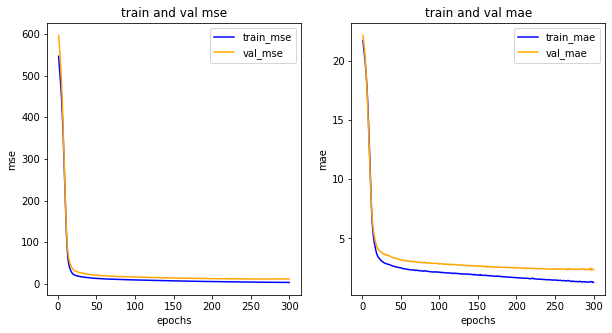

In [31]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

In [32]:
# 모델 평가하기
model.evaluate(x_test, y_test) # mae 2.0 -> 실제 집값과 2000 달러정도 차이

4/4 [==============================] - 0s 3ms/step - loss: 11.0972 - mae: 2.4394 - mse: 11.0972


[11.097163200378418, 2.439354658126831, 11.097163200378418]

모델 예측하기

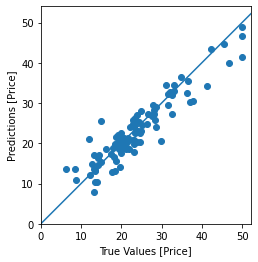

In [33]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])